# Mengukur Performa Penjualan Online Retail

Data berisi semua transaksi yang terjadi di
tahun 2009-2011 pada perusahaan ritel online, yang memiliki 1067371 baris dan 8 kolom, kolom-kolom tersebut yakni: \
● Invoice : Nomor invoice 6 digit yang ditetapkan secara unik untuk setiap transaksi. Jika kode ini dimulai dengan huruf 'C', itu menunjukkan pembatalan.\
● StockCode : Kode produk (barang). Angka 5 digit yang ditetapkan secara unik untuk setiap produk yang berbeda.\
● Description : Nama produk.\
● Quantity : Jumlah kuantitas setiap produk per transaksi.\
● InvoiceDate : Tanggal dan waktu invoice, yakni hari dan waktu saat transaksi dibuat.\
● UnitPrice : Harga satuan atau harga produk per unit dalam sterling (£).\
● CustomerID : Nomor 5 digit yang ditetapkan secara unik untuk setiap pelanggan.\
● Country : Nama negara tempat tinggal pelanggan.\
Bagaimana performa penjualan ritel online?

## Load Data

In [39]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Rakamin/online_retail_II.csv')
df.sample(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
281176,516768,22195,LARGE HEART MEASURING SPOONS,12,2010-07-22 17:30:00,1.65,16588.0,United Kingdom
662660,548148,21249,WOODLAND HEIGHT CHART STICKERS,1,2011-03-29 12:31:00,2.95,17931.0,United Kingdom
786480,559817,15058B,PINK POLKADOT GARDEN PARASOL,1,2011-07-12 16:20:00,10.79,NaN,United Kingdom
571168,540277,82552,WASHROOM METAL SIGN,24,2011-01-06 12:18:00,1.45,14258.0,United Kingdom
106911,499638,77101A,UNION FLAG WINDSOCK,1,2010-03-01 13:45:00,2.51,NaN,United Kingdom


## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


Terdapat kolom yang tipe datanya tidak sesuai yakni kolom InvoiceDate

In [ ]:
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


Terdapat angka yang tidak wajar yakni pada kolom `Quantity` dan `Price` karena minimal valuenya itu minus value, minus value mengindikasikan transaksi yang dibatalkan.
`Customer ID` memiliki 824.364 uniq value yang mengindikasikan bahwa 1 Customer ID telah melakukan lebih dari 1 kali transaksi

In [ ]:
df.shape

(1067371, 8)

In [ ]:
df.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

Terdapat Kolom yang memiliki null values(missing values) yakni pada kolom `Description` dan `Customer ID`

## Average Revenue per Year

### Create New Feature

#### Year

In [30]:
## Mengubah tipe data kolom InvoiceDate menjadi datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1067371 entries, 0 to 1067370
Series name: InvoiceDate
Non-Null Count    Dtype         
--------------    -----         
1067371 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 8.1 MB


In [31]:
# Mengekstrak Kolom InvoiceDate menjadi kolom baru `Year`
df['Year'] = df['InvoiceDate'].dt.year

In [32]:
df.sample(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
289911,517626,40016,CHINESE DRAGON PAPER LANTERNS,24,2010-07-30 12:10:00,0.42,16428.0,United Kingdom,2010
130872,501832,85206A,CREAM FELT EASTER EGG BASKET,1,2010-03-19 16:43:00,3.36,NaN,United Kingdom,2010
425571,530060,22689,DOORMAT MERRY CHRISTMAS RED,1,2010-11-01 11:35:00,14.43,NaN,United Kingdom,2010


#### Revenue
(Quantity * Price)
tanpa ada transaksi yang gagal

In [34]:
# Filter data tanpa minus value untuk Kolom Quantity dan Price serta Invoice serta tanpa value C di kolom Invoice
sales = df[(df['Quantity']> 0) & (df['Price'] > 0) & (~df['Invoice'].str.contains('C'))]
sales.sample(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
579434,540848,21879,HEARTS GIFT TAPE,10,2011-01-12 09:26:00,0.43,NaN,United Kingdom,2011
732359,554959,20711,JUMBO BAG TOYS,1,2011-05-27 15:18:00,4.13,NaN,United Kingdom,2011
1034937,579307,22114,HOT WATER BOTTLE TEA AND SYMPATHY,8,2011-11-29 11:34:00,4.25,17655.0,United Kingdom,2011


In [38]:
# Membuat fitur baru kolom Revenue
df['Revenue'] = sales['Quantity'] * sales['Price']
df.sample(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
676493,549526,84970L,SINGLE HEART ZINC T-LIGHT HOLDER,12,2011-04-08 15:49:00,0.95,13630.0,United Kingdom,2011,11.40
580233,540977,10133,COLOURING PENCILS BROWN TUBE,4,2011-01-12 15:01:00,0.81,NaN,United Kingdom,2011,3.24
464722,533295,21645,ASSORTED TUTTI FRUTTI ROUND BOX,1,2010-11-16 16:08:00,1.65,15161.0,United Kingdom,2010,1.65


In [47]:
# Average Revenue per Year
avg = df.groupby('Year')['Revenue'].mean().reset_index()
avg

,Year,Revenue
0,2009,18.783942
1,2010,20.240022
2,2011,20.144193


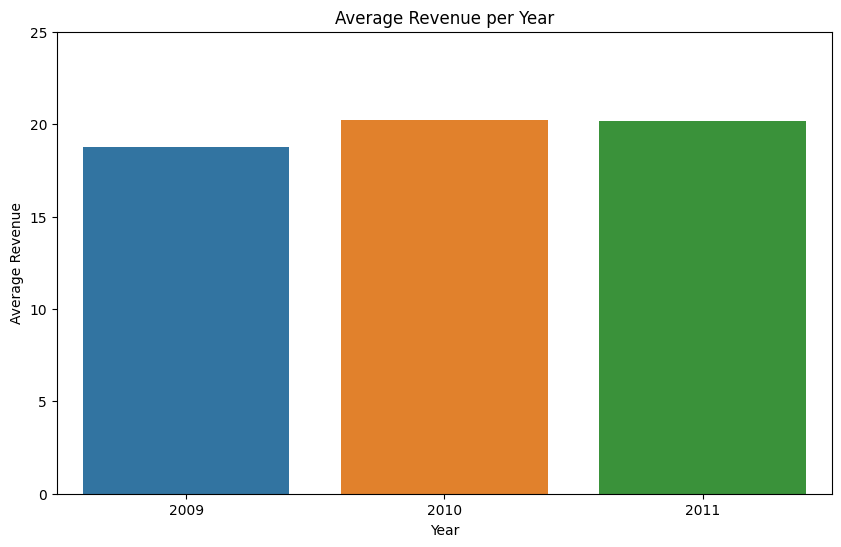

In [60]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data = avg, x = 'Year', y = 'Revenue')
plt.xlabel('Year')
plt.ylabel('Average Revenue')
plt.ylim(0,25)
plt.title('Average Revenue per Year')
plt.show()

### Interpretation

Dilihat dari grafik diatas menunjukan bahwa Rata-rata pendapatan tahunan tidak bervariasi secara signifikan dari tahun ke tahun dengan fluktuasi yang relatif kecil, sehingga mengindikasikan bahwa online retail ini stabilitas dalam bisnis. <br>
Perusahaan perlu mempertimbangkan untuk Analisis pelanggan dengan melakukan analisis lebih lanjut mengenai profil pelanggan, preferensi dan umpan balik dapat membantu meningkatkan kepuasan pelanggan dan mengidentifikasi peluang untuk menghasilkan pendapatan tambahan

## Number of Finished and Canceled Transactions

In [80]:
# Customer yang menyelesaikan Transaksi
finished = sales.dropna(subset=['Customer ID'])

In [81]:
# Customer yang membatalkan transaksi
cancel = df[df['Invoice'].str.contains('C')]


In [102]:
# Number of Finished and Canceled Transaction Each Year
num_finished = finished.groupby('Year')['Invoice'].count().reset_index()
num_canceled = cancel.groupby('Year')['Invoice'].count().reset_index()
print('Number of Finished Transactions :')
print(num_finished)
print('\nNumber of Canceled Transactions')
print(num_canceled)

Number of Finished Transactions :
   Year  Invoice
0  2009    30754
1  2010   403067
2  2011   371728

Number of Canceled Transactions
   Year  Invoice
0  2009     1015
1  2010     9919
2  2011     8560


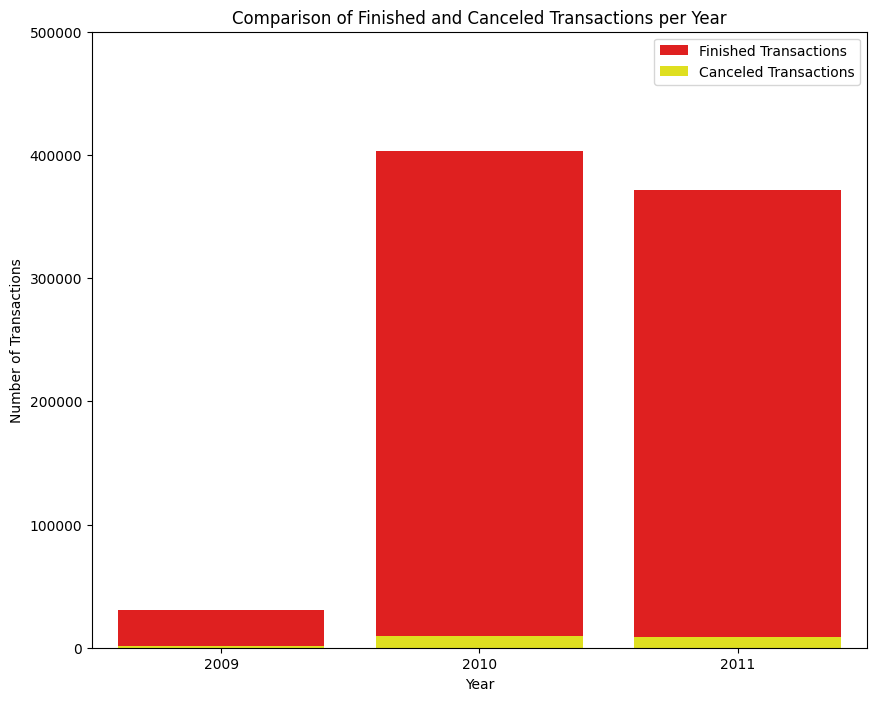

In [103]:
plt.figure(figsize=(10,8))
sns.barplot(data=num_finished,x='Year', y ='Invoice', color = 'red', label='Finished Transactions')
sns.barplot(data=num_canceled, x='Year', y = 'Invoice', color = 'yellow', label ='Canceled Transactions')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.ylim(0,500000)
plt.title('Comparison of Finished and Canceled Transactions per Year')
plt.legend()

### Interpretation

Data menunjukkan bahwa transaksi yang selesai meningkat secara signifikan dari tahun 2009 ke tahun 2010 dari 30754 ke 403067, namun mengalami sedikit penurunan di tahun 2011 menjadi 371728, hal ini menunjukkan mengalami pertumbuhan awal yang signifikan diikuti dengan penurunan sedikit. Dan untuk transaksi yang dibatalkan juga mengalami peningkatan seiring waktu akan tetapi, tidak sebanyak transaksi yang selesai. Hal ini menunjukkan bahwa sebagian besar transaksi telah diselesaikan. tetapi ada beberapa yang dibatalkan. Perusahaan perlu melakukan analisis tren lebih lanjut untuk mengetahui apakah ada faktor musiman atau faktor eksternal tertentu yang mempengaruhi jumlah transaksi yang selesai dan dibatalkan.

## Cancellation Rate

In [98]:
## all transactions
all_tr = df.groupby('Year')['Invoice'].count().reset_index()

In [101]:
all_tr

,Year,Invoice
0,2009,45228
1,2010,522714
2,2011,499429


In [117]:
# Menggabungkan dua tabel
cancel_rate = pd.merge(num_canceled, all_tr, on='Year', suffixes=('_num_cancel', '_all_tr'))

# Menghitung Cancelation rate
cancel_rate['cancel_rate'] = cancel_rate['Invoice_num_cancel'] / cancel_rate['Invoice_all_tr'] * 100

cancel_rate

,Year,Invoice_num_cancel,Invoice_all_tr,cancel_rate
0,2009,1015,45228,2.244185
1,2010,9919,522714,1.897596
2,2011,8560,499429,1.713957


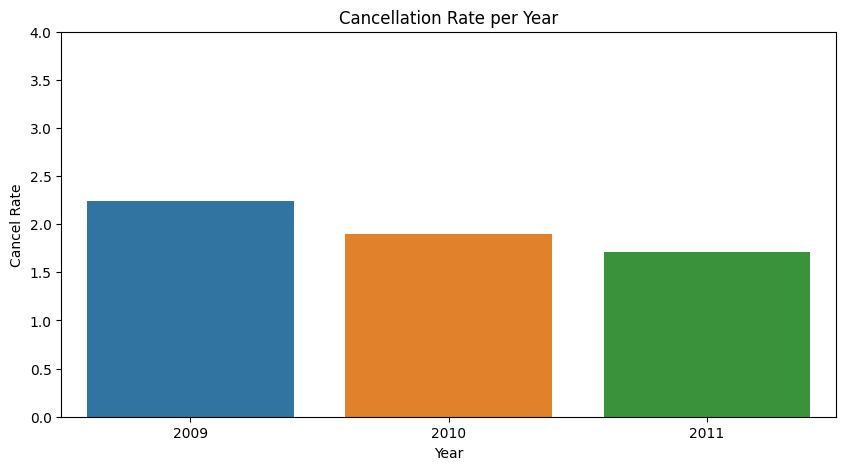

In [124]:
plt.figure(figsize=(10,5))
sns.barplot(data=cancel_rate, x='Year', y = 'cancel_rate')
plt.xlabel('Year')
plt.ylabel('Cancel Rate')
plt.ylim(0, 4)
plt.title('Cancellation Rate per Year')
plt.show()

### Interpretation
Dari data di atas menunjukkan bahwa persentase transaksi yang dibatalkan mengalami penurunan dari tahun ke tahun yang mengindikasikan kearah positif. Hal ini menunjukkan bahwa perusahaan mungkin telah mengambil langkah-langkah untuk mengurangi pembatalan transaksi. Perusahaan perlu menganalisis alasan-alasan pembatalan transaksi untuk mengidentifikasi bagian mana yang perlu diperbaiki atau ditingkatkan